<a href="https://colab.research.google.com/github/Hariprakashhp/industrial-copper-modeling/blob/main/Industrial_Copper_Modeling_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938,25,Won,W,41,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963,30,Won,WI,28,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84135,E4482087-0959-41D6-9355-9A966262326A,20201207,5.511658,30205658,32,Won,W,10,1.20,1180.0,NaN,611993,20210401.0,916.00
84136,9FF0A85E-75ED-47A6-A2A1-3B2088B3D753,20201207,4.424904,30205658,32,Won,W,10,0.50,1000.0,NaN,611993,20210401.0,1008.00
84137,ABB8509E-2180-4DEE-AF3B-4AE3EDE888DE,20201207,9.326179,30205658,32,Won,W,10,0.70,1000.0,NaN,611993,20210401.0,976.00
84138,C858EC88-E49C-4AC2-82E9-66510D2F9168,20201207,28.795410,30201589,84,Won,S,15,8.00,1470.0,NaN,640405,20210101.0,1025.00


In [ ]:
df.isna().sum()

id                   1
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref     36095
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.shape

(84140, 14)

In [ ]:
del df["material_ref"]

In [ ]:
df.dtypes

id                object
item_date          int64
quantity tons    float64
customer           int64
country            int64
status            object
item type         object
application        int64
thickness        float64
width            float64
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [ ]:
for column in df.columns[1:]:
  iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
  upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
  df[column] = df[column].clip(lower_threshold, upper_threshold)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns[1:]]
y = df.loc[:, 'country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)

In [ ]:
df['selling_price'] = df['selling_price'].astype(str)
df['width'] = df['width'].astype(str)

<Axes: xlabel='country'>

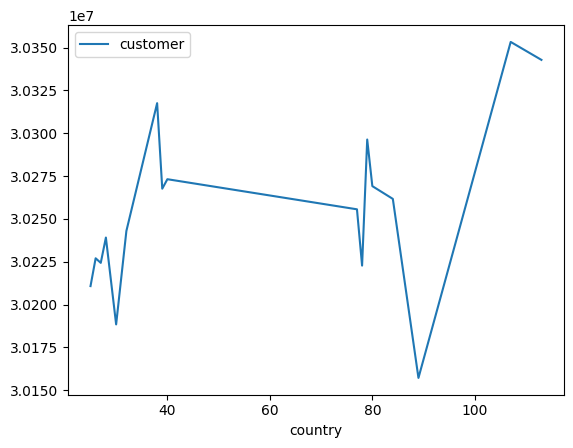

In [ ]:
df.groupby('country')['customer'].mean().reset_index().plot.line(x = 'country', y= 'customer')

In [ ]:
df['application'] = df['application'].astype(str)

,country,product_ref
country,1.000000,-0.167039
product_ref,-0.167039,1.000000


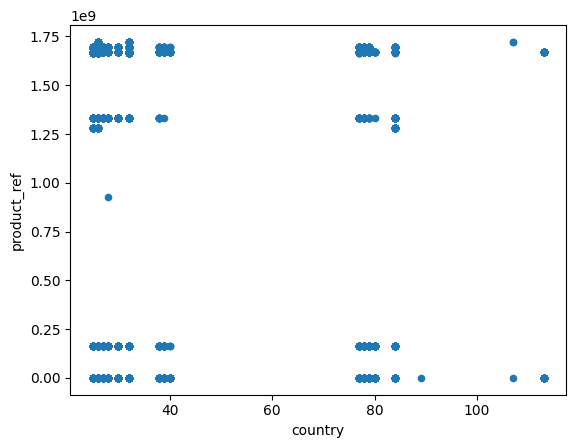

In [ ]:
df.plot.scatter(x = 'country', y = 'product_ref')
df[['country', 'product_ref']].corr()